<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/SPI1_regression/TrainRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
![[ -e SPI1_negatives.tsv.gz ]] || wget -O SPI1_negatives.tsv.gz http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_negatives.tsv.gz -O SPI1_negatives.tsv.gz
![[ -e SPI1_positives_regression_labels.tsv.gz ]] || wget -O SPI1_positives_regression_labels.tsv.gz http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_positives_regression_labels.tsv.gz

#download hg38 fasta file
![[ -e hg38.fa ]] || wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz -O hg38.fa.gz
![[ -e hg38.fa ]] || gunzip hg38.fa.gz

#install pyfaidx and prepare an index for hg38.fa
!pip install pyfaidx
from pyfaidx import Fasta
Fasta("hg38.fa") #this will build the index if it does not exist

--2019-09-04 00:25:52--  http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_negatives.tsv.gz
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242572693 (231M) [application/x-gzip]
Saving to: ‘SPI1_negatives.tsv.gz’

SPI1_negatives.tsv. 100%[===================>] 231.33M  4.22MB/s    in 39s     

2019-09-04 00:26:31 (5.98 MB/s) - ‘SPI1_negatives.tsv.gz’ saved [242572693/242572693]

--2019-09-04 00:26:32--  http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_positives_regression_labels.tsv.gz
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4179271 (4.0M) [application/x-gzip]
Saving to: ‘

Fasta("hg38.fa")

In [0]:
![[ -e noheader_SPI1_negatives.tsv.gz ]] || zcat SPI1_negatives.tsv.gz | grep -v 'START' | gzip -c > noheader_SPI1_negatives.tsv.gz
![[ -e noheader_SPI1_positives_regression_labels.tsv.gz ]] || zcat SPI1_positives_regression_labels.tsv.gz | grep -v 'START' | gzip -c > noheader_SPI1_positives_regression_labels.tsv.gz

![[ -e train_SPI1_negatives.tsv.gz ]] || zcat noheader_SPI1_negatives.tsv.gz | egrep -v 'chr1|chr8|chr21|chr22' | gzip -c > train_SPI1_negatives.tsv.gz
![[ -e train_SPI1_positives_regression_labels.tsv.gz ]] || zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep -v 'chr1|chr8|chr21|chr22' | gzip -c > train_SPI1_positives_regression_labels.tsv.gz
!zcat noheader_SPI1_negatives.tsv.gz | egrep 'chr1|chr8|chr21' | gzip -c > test_SPI1_coords.tsv.gz
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep 'chr1|chr8|chr21' | gzip -c >> test_SPI1_coords.tsv.gz

In [3]:
#num negs in validation set
!zcat noheader_SPI1_negatives.tsv.gz | egrep 'chr22'  | wc -l

995472


In [6]:
#num pos in validation set
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep 'chr22' | wc -l

6127


In [8]:
#combine the positives and negatives in the validation set; subsample the
# validation set for speed of calculation
!zcat noheader_SPI1_negatives.tsv.gz | egrep 'chr22' | perl -ne 'if ($.%25==0) {print $_}' | gzip -c > negsubsampled_valid.tsv.gz
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep 'chr22' | gzip -c >> negsubsampled_valid.tsv.gz
!zcat negsubsampled_valid.tsv.gz | wc -l

45945


In [3]:
!git clone https://github.com/kundajelab/seqdataloader.git

Cloning into 'seqdataloader'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 1047 (delta 17), reused 34 (delta 12), pack-reused 1003
Receiving objects: 100% (1047/1047), 3.90 MiB | 3.56 MiB/s, done.
Resolving deltas: 100% (643/643), done.


In [1]:
%cd /content/seqdataloader
!git checkout downsamplenegatives
!git pull
!pip uninstall seqdataloader
!pip install .
%cd /content

/content/seqdataloader
Already on 'downsamplenegatives'
Your branch is up to date with 'origin/downsamplenegatives'.
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 7 (delta 4), reused 7 (delta 4), pack-reused 0
Unpacking objects: 100% (7/7), done.
From https://github.com/kundajelab/seqdataloader
   9d8eec0..873868f  downsamplenegatives -> origin/downsamplenegatives
Updating 9d8eec0..873868f
Fast-forward
 seqdataloader/batchproducers/coordbased/coordstovals/lookup.py | 7 +++++--
 1 file changed, 5 insertions(+), 2 deletions(-)
Uninstalling seqdataloader-0.126:
  Would remove:
    /usr/local/bin/db_ingest
    /usr/local/bin/genomewide_labels
    /usr/local/lib/python3.6/dist-packages/seqdataloader-0.126.dist-info/*
    /usr/local/lib/python3.6/dist-packages/seqdataloader/batchproducers/*
    /usr/local/lib/python3.6/dist-packages/seqdataloader/dbingest/*
    /usr/local/lib/python3.6/dist-pa

In [2]:
from seqdataloader.batchproducers import coordbased
import numpy as np

labels_coordstovals = coordbased.coordstovals.lookup.SimpleLookup(
    lookup_file="noheader_SPI1_positives_regression_labels.tsv.gz",
    transformation=lambda x: np.log(1+x))
input_coordstovals = coordbased.coordstovals.fasta.PyfaidxCoordsToVals(
    genome_fasta_path="hg38.fa")

valid_batchproducer = coordbased.coordbatchproducers.SimpleCoordsBatchProducer(
    bed_file="negsubsampled_valid.tsv.gz",
    batch_size=64,
    shuffle_before_epoch=False,
    seed=None)

train_batchproducer = (
  coordbased.coordbatchproducers.DownsampleNegativesCoordsBatchProducer(
    pos_bed_file="train_SPI1_positives_regression_labels.tsv.gz",
    neg_bed_file="train_SPI1_negatives.tsv.gz",
    target_proportion_positives=0.5,
    batch_size=64,
    shuffle_before_epoch=True,
    seed=1234))

train_batch_generator = coordbased.core.KerasBatchGenerator(
    coordsbatch_producer=train_batchproducer,
    inputs_coordstovals=input_coordstovals,
    targets_coordstovals=labels_coordstovals,
    coordsbatch_transformer=\
      coordbased.coordbatchtransformers.ReverseComplementAugmenter())

valid_batch_generator = coordbased.core.KerasBatchGenerator(
    coordsbatch_producer=valid_batchproducer,
    inputs_coordstovals=input_coordstovals,
    targets_coordstovals=labels_coordstovals)


Using TensorFlow backend.


Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Reading in positive bed file
Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Got 140650  coords in positive bed file
Reading in negative bed file
Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Got 27967753  coords in negative bed file
The target proportion of positives of 0.5 requires the negative set to be subsampled by a factor of 199 which will result in a #neg of 140541
Using an offset of  0  before striding


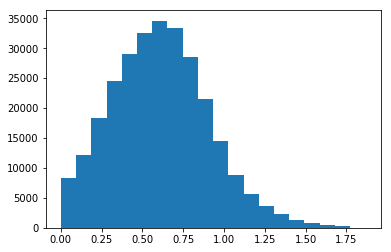

In [9]:
vals = list(labels_coordstovals.lookup.values())
from matplotlib import pyplot as plt
plt.hist(np.array(vals).squeeze(), bins=20)
plt.show()

In [0]:
import keras
from keras import backend as K
import tensorflow as tf

def manual_mse(y_true, y_pred):
  return K.mean(K.square(y_pred-y_true), axis=-1)

def mse_on_positives(y_true, y_pred):
  the_mask = tf.greater(y_true, 0.0)
  masked_y_true = tf.boolean_mask(y_true, the_mask)
  masked_y_pred = tf.boolean_mask(y_pred, the_mask)
  return K.mean(K.square(masked_y_pred-masked_y_true),axis=-1)

def mse_on_negatives(y_true, y_pred):
  the_mask = tf.equal(y_true, 0.0)
  masked_y_true = tf.boolean_mask(y_true, the_mask)
  masked_y_pred = tf.boolean_mask(y_pred, the_mask)
  return K.mean(K.square(masked_y_pred-masked_y_true),axis=-1)


def get_model(num_conv_filters,
              conv_filter_length,
              pool_length_and_stride,
              num_dense_units):
  input = keras.layers.Input(shape=(1000,4), name="sequence")
  conv1 = keras.layers.convolutional.Conv1D(
              filters=num_conv_filters, kernel_size=conv_filter_length,
              padding="same")(input)
  conv1batchnorm = keras.layers.normalization.BatchNormalization()(conv1)
  conv1relu = keras.layers.core.Activation(activation="relu")(conv1batchnorm)
  conv2 = keras.layers.convolutional.Conv1D(
              filters=num_conv_filters,
              kernel_size=conv_filter_length,
              padding="same")(conv1relu)
  conv2batchnorm = keras.layers.normalization.BatchNormalization()(conv2)
  conv2relu = keras.layers.core.Activation(activation="relu")(conv2batchnorm)
  conv3 = keras.layers.convolutional.Conv1D(
              filters=num_conv_filters,
              kernel_size=conv_filter_length,
              padding="same")(conv2relu)
  conv3batchnorm = keras.layers.normalization.BatchNormalization()(conv3)
  conv3relu = keras.layers.core.Activation(activation="relu")(conv3batchnorm)
  avgpool = keras.layers.convolutional.AveragePooling1D(
                pool_size=pool_length_and_stride,
                strides=pool_length_and_stride)(conv3relu)
  flatten = keras.layers.core.Flatten()(avgpool)
  dense1 = keras.layers.core.Dense(units=num_dense_units)(flatten)
  dense1relu = keras.layers.core.Activation(activation="relu")(dense1)
  dense2 = keras.layers.core.Dense(units=num_dense_units)(dense1relu)
  dense2relu = keras.layers.core.Activation(activation="relu")(dense2)
  output = keras.layers.core.Dense(units=1,
                                   name="output")(dense2relu)
  conv_model = keras.models.Model(inputs=input, outputs=output)
  conv_model.compile(optimizer=keras.optimizers.Adam(),
                     loss={"output": "mse"},
                     metrics=[mse_on_positives,
                              mse_on_negatives,
                              manual_mse])
  return conv_model

conv_model = get_model(num_conv_filters=30,
                       conv_filter_length=15,
                       pool_length_and_stride=40,
                       num_dense_units=30)

conv_model.summary()
early_stopping_callback = keras.callbacks.EarlyStopping(
                              monitor='mse_on_positives',
                              patience=3,
                              restore_best_weights=True)
fit_history = conv_model.fit_generator(
  generator=train_batch_generator,
  validation_data=valid_batch_generator,
  epochs=100,
  callbacks=[early_stopping_callback]
)
#the callback isn't triggered if the upper epoch limit is hit,
# so make sure the set the weights from the best epoch at the end
model.set_weights(early_stopping_callback.best_weights)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequence (InputLayer)        (None, 1000, 4)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 1000, 30)          1830      
_________________________________________________________________
batch_normalization_22 (Batc (None, 1000, 30)          120       
_________________________________________________________________
activation_36 (Activation)   (None, 1000, 30)          0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 1000, 30)          13530     
_________________________________________________________________
batch_normalization_23 (Batc (None, 1000, 30)          120       
_________________________________________________________________
activation_37 (Activation)   (None, 1000, 30)          0   